# 공공 인공지능 Open API 활용
- 여러가지 객체 검출

In [1]:
with open('etriaikey.txt') as kfile:
    etri_key = kfile.read()

In [2]:
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [3]:
import os
img_file = 'images/공원.jpg'
_, image_type = os.path.splitext(img_file)
image_type

'.jpg'

In [4]:
image_type = 'jpg' if image_type == '.jfif' else image_type[1:]
image_type

'jpg'

In [5]:
with open(img_file, 'rb') as file:
    image_contents = base64.b64encode(file.read()).decode("utf8")

In [7]:
request_json = {
    "access_key": etri_key,
    "argument": {
        "type": image_type,
        "file": image_contents
    }
}

In [8]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [9]:
print("[responseCode] " + str(response.status))

[responseCode] 200


In [10]:
response.data

b'{"result":0,"return_object":{"data":[{"class":"person","confidence":"0.993701","x":"416","y":"568","width":"190","height":"160"},{"class":"person","confidence":"0.958099","x":"321","y":"592","width":"132","height":"130"},{"class":"person","confidence":"0.956546","x":"968","y":"488","width":"16","height":"41"},{"class":"person","confidence":"0.954333","x":"1100","y":"506","width":"24","height":"38"},{"class":"person","confidence":"0.907414","x":"496","y":"472","width":"12","height":"30"},{"class":"person","confidence":"0.894190","x":"303","y":"478","width":"23","height":"63"},{"class":"person","confidence":"0.695921","x":"809","y":"481","width":"18","height":"43"},{"class":"person","confidence":"0.645447","x":"273","y":"478","width":"22","height":"64"}]}}'

In [11]:
result = json.loads(response.data)
result

{'result': 0,
 'return_object': {'data': [{'class': 'person',
    'confidence': '0.993701',
    'x': '416',
    'y': '568',
    'width': '190',
    'height': '160'},
   {'class': 'person',
    'confidence': '0.958099',
    'x': '321',
    'y': '592',
    'width': '132',
    'height': '130'},
   {'class': 'person',
    'confidence': '0.956546',
    'x': '968',
    'y': '488',
    'width': '16',
    'height': '41'},
   {'class': 'person',
    'confidence': '0.954333',
    'x': '1100',
    'y': '506',
    'width': '24',
    'height': '38'},
   {'class': 'person',
    'confidence': '0.907414',
    'x': '496',
    'y': '472',
    'width': '12',
    'height': '30'},
   {'class': 'person',
    'confidence': '0.894190',
    'x': '303',
    'y': '478',
    'width': '23',
    'height': '63'},
   {'class': 'person',
    'confidence': '0.695921',
    'x': '809',
    'y': '481',
    'width': '18',
    'height': '43'},
   {'class': 'person',
    'confidence': '0.645447',
    'x': '273',
    'y': '47

## 시각화

In [13]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt 
%matplotlib inline

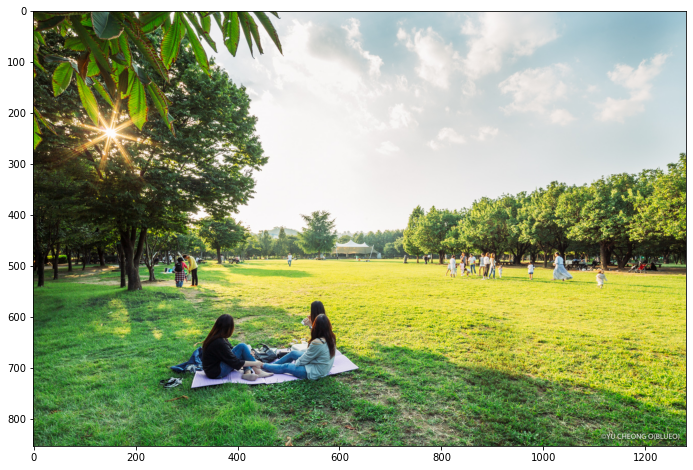

In [14]:
plt.figure(figsize=(12,8))
image = Image.open(img_file)
plt.imshow(image)
plt.show()

In [15]:
draw = ImageDraw.Draw(image)
obj_list = result['return_object']['data']
for obj in obj_list:
    name = obj['class']
    x = int(obj['x'])
    y = int(obj['y'])
    w = int(obj['width'])
    h = int(obj['height'])
    draw.text((x+10,y+10), name, font=ImageFont.truetype('malgun.ttf',20), fill=(255,0,0))
    draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=2)

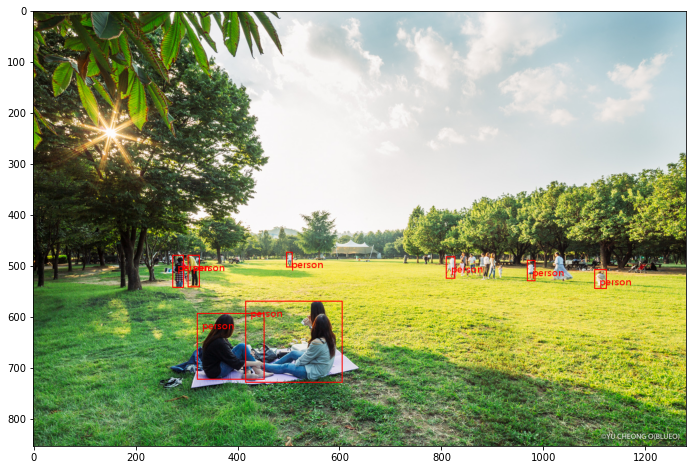

In [16]:
plt.figure(figsize=(12,8))
plt.imshow(image)
plt.show()

## 여러개의 그림 객체검출하기

In [17]:
from glob import glob
glob('images/*')

['images\\공원.jpg', 'images\\동물원.jpg']

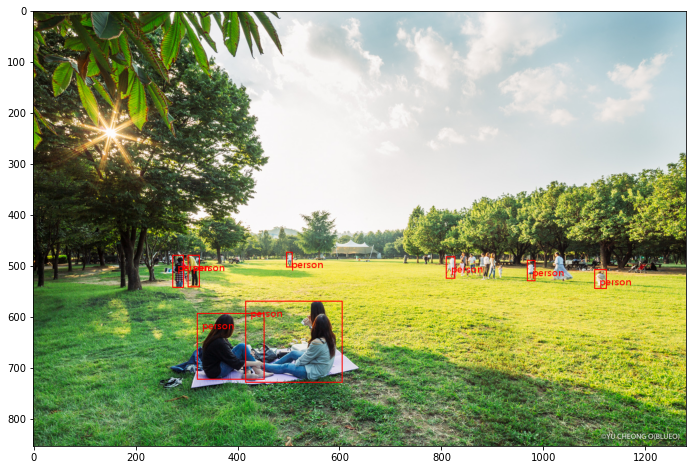

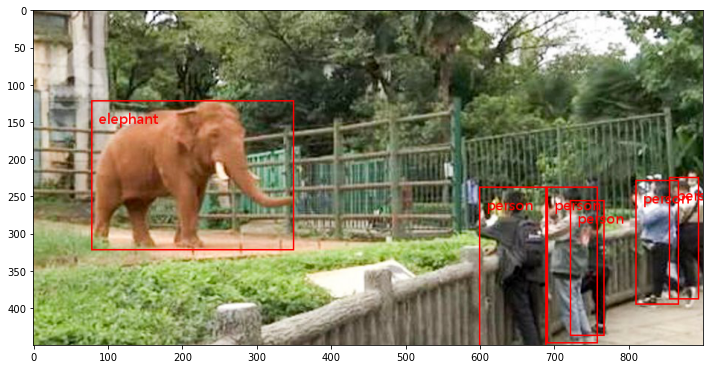

In [20]:
for img_file in glob('images/*'):
    _, image_type = os.path.splitext(img_file)
    image_type = 'jpg' if image_type == '.jfif' else image_type[1:]
    with open(img_file, 'rb') as file:
        image_contents = base64.b64encode(file.read()).decode("utf8")
    
    request_json = {
        "access_key": etri_key,
        "argument": {
            "type": image_type,
            "file": image_contents
        }
    }
    response = http.request(
        "POST",
        openApiURL,
        headers={"Content-Type": "application/json; charset=UTF-8"},
        body=json.dumps(request_json)
    )
    result = json.loads(response.data)
    obj_list = result['return_object']['data']

    image = Image.open(img_file)
    draw = ImageDraw.Draw(image)
    for obj in obj_list:
        name = obj['class']
        x = int(obj['x'])
        y = int(obj['y'])
        w = int(obj['width'])
        h = int(obj['height'])
        draw.text((x+10,y+10), name, font=ImageFont.truetype('malgun.ttf',20), fill=(255,0,0))
        draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=2)
    
    plt.figure(figsize=(12,8))
    plt.imshow(image)
    plt.show()